In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('Iris.csv') ## Load data

In [47]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [62]:
df.columns.unique

<bound method Index.unique of Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')>

In [53]:
df_binary = df[df["Species"] != 'Iris-versicolor'] # Drop 3rd Class
df_binary = df_binary.drop(["Id"], axis=1)
df_binary["Species"] = np.where(df_binary["Species"] == 'Iris-setosa', 1.0, df_binary["Species"])
df_binary["Species"] = np.where(df_binary["Species"] == 'Iris-virginica', 0.0, df_binary["Species"])
df_binary.Species = pd.to_numeric(df_binary.Species) # Convert to the numerical values
df_binary.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1.0
1,4.9,3.0,1.4,0.2,1.0
2,4.7,3.2,1.3,0.2,1.0
3,4.6,3.1,1.5,0.2,1.0
4,5.0,3.6,1.4,0.2,1.0


In [54]:
df_binary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  100 non-null    float64
 1   SepalWidthCm   100 non-null    float64
 2   PetalLengthCm  100 non-null    float64
 3   PetalWidthCm   100 non-null    float64
 4   Species        100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB


In [55]:
cls = df_binary["Species"]
df_binary = df_binary.drop(["Species"],axis=1)
data = list(zip(df_binary.to_numpy(),cls))
data[:5]

[(array([5.1, 3.5, 1.4, 0.2]), 1.0),
 (array([4.9, 3. , 1.4, 0.2]), 1.0),
 (array([4.7, 3.2, 1.3, 0.2]), 1.0),
 (array([4.6, 3.1, 1.5, 0.2]), 1.0),
 (array([5. , 3.6, 1.4, 0.2]), 1.0)]

In [56]:
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=1, test_size=.25, random_state=0)
rs.get_n_splits(data)
x_train = []
x_test = []
for train_index, test_index in rs.split(data):
    x_train = [data[i] for i in train_index]
    x_test = [data[i] for i in test_index]


## Our Data

Iris_1  = \[SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm\]




In [ ]:
feature_size = 4
weights = np.zeros(feature_size,dtype=float)
bias = 0

In [ ]:
instance = (np.array(feature_size), # features
            0 or 1) # class

## Classifier Function
$w^T \cdot x + b = 0$

In [ ]:
def classifier(instance):
    # Not a probability but a number
    # y = w.x + b 
    return np.dot(weights,instance[0]) + bias

In [ ]:
def sigmoid(x):
	return 1 / (1 + np.exp(-x))   

t1 = np.arange(-5.0, 5.0, 0.1)

fig = plt.figure()
plt.axvline(color="black")
plt.axhline(y=0,color="black",linestyle="--") # 0 Prediction
plt.axhline(y=0.5,color="red",linestyle="--") # Decision boundary
plt.axhline(y=1.0,color="black",linestyle="--") # 1 Prediction

plt.xlabel("instances")
plt.ylabel("class")
plt.title("Sigmoid Function")
plt.plot(t1, sigmoid(t1), 'b-')

plt.show()

In [ ]:
def cross_entropy_loss(data, batch_size):

    cost = 0
    for instance in data:
        cost += (predict(instance) * np.log(sigmoid(classifier(instance))) + ((1-instance[1])*np.log(1-sigmoid(classifier(instance)))))

    return cost / batch_size

### Prediction Function



\begin{align*}
g(\sigma(w^T.x_i + b)) = 
\begin{cases}
    \text{if } P>0.5,& 1\\
    \text{otherwise}, & 0
\end{cases}
\end{align*}


In [ ]:
def predict(instance):
    P = sigmoid(classifier(instance))
    if (P > 0.5):
        return 1
    return 0

# Gradient Descend

## Mathematical Notations


$\Theta$ = Parameter Vector

$\hat{\Theta}$ = Updated Parameter Vector

$w_i$ = Vector Dimension

$\hat{w_i}$ = Vector Dimension

$y$ = Actual class of the instance

$\hat{y}$ = Predicted class 

$b$ = Bias

$\eta$ = Learning rate

$m$ = Batch Size(Set of Data Instances)

## Stochastic Gradient Descend


For every weight:

\begin{align*}
\hat{w_i} = w_i - \eta.\frac{1}{m}\sum_{m=1}^{m}[{\sigma(x) - y_i].x_i}
\end{align*}

\begin{align*}
\hat{\Theta} = \Theta - \eta.\frac{1}{m}\sum_{m=1}^{m}[{\sigma(x) - y].x_i}
\end{align*}

In [19]:
LEARNING_RATE = 0.001

weights = np.zeros(feature_size,dtype=float)
bias = 0

costs = []

for instance in x_train:
    
    weights[0] -= LEARNING_RATE * (sigmoid(classifier(instance))-instance[1])*instance[0][0]
    weights[1] -= LEARNING_RATE * (sigmoid(classifier(instance))-instance[1])*instance[0][1]
    weights[2] -= LEARNING_RATE * (sigmoid(classifier(instance))-instance[1])*instance[0][2]
    weights[3] -= LEARNING_RATE * (sigmoid(classifier(instance))-instance[1])*instance[0][3]

    bias -= LEARNING_RATE * (sigmoid(classifier(instance)) * instance[1])

    costs.append(-1*cross_entropy_loss(data=x_train,batch_size=len(x_train)))

[-0.01319729  0.01649276 -0.06363017 -0.02854316]


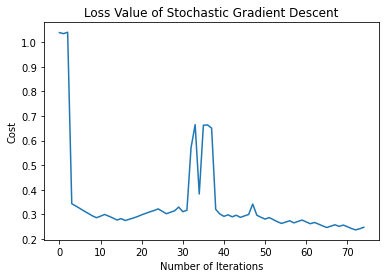

In [20]:
iterations = range(len(costs))
plt.plot(iterations,costs)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Loss Value of Stochastic Gradient Descent")
# Why?? you should able to explain it
print(weights)

## Batch Gradient Descend

$\Theta$ = Parameter Vector

$\hat{\Theta}$ = Updated Parameter Vector

$y$ = Actual class of the instance

$\hat{y}$ = Predicted class 

$b$ = Bias

$\eta$ = Learning rate

$m$ = Batch Size(Set of Data Instances)

For every weight:

\begin{align*}
\hat{w_i} = w_i - \eta.\frac{1}{m}\sum_{m=1}^{m}[{\sigma(x) - y_i].x_i}
\end{align*}

\begin{align*}
\hat{\Theta} = \Theta - \eta.\frac{1}{m}\sum_{m=1}^{m}[{\sigma(x) - y].x_i}
\end{align*}


In [21]:
LEARNING_RATE = 0.001
# Select small find 
# Example --> 0.5 optimazed
#                   then configurate over this value

# Try to use 
weights = np.zeros(feature_size,dtype=float) # [0,0,0,0]
bias = 0

costs = []
epoch = 0
batch_size = 75
while epoch < 10000:

    weight_0_loss = weight_1_loss = weight_2_loss = weight_3_loss = bias_loss = 0

    for instance in x_train[:batch_size]:

        # Logistic Regression/:Regularization parameter Fine-Tuning(Optimization)--> Stack Overflow/Research Gate

        weight_0_loss += (sigmoid(classifier(instance))-instance[1]) * instance[0][0]
        weight_1_loss += (sigmoid(classifier(instance))-instance[1]) * instance[0][1]
        weight_2_loss += (sigmoid(classifier(instance))-instance[1]) * instance[0][2]
        weight_3_loss += (sigmoid(classifier(instance))-instance[1]) * instance[0][3]

        bias_loss +=  sigmoid(classifier(instance)) - instance[1]

    costs.append(-1*cross_entropy_loss(data=x_train,batch_size=len(x_train)))

    weights[0] -= LEARNING_RATE * (weight_0_loss / batch_size)
    weights[1] -= LEARNING_RATE * (weight_1_loss / batch_size)
    weights[2] -= LEARNING_RATE * (weight_2_loss / batch_size)
    weights[3] -= LEARNING_RATE * (weight_3_loss / batch_size)

    bias -= LEARNING_RATE * (sigmoid(classifier(instance)) - instance[1])

    epoch += 1
print(weights)

[ 0.26814732  0.78792885 -1.42607618 -0.70559139]


Text(0.5, 1.0, 'Loss Value of Batch Gradient Descent')

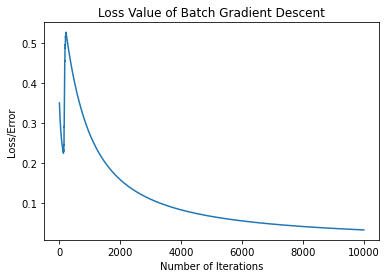

In [22]:
iterations = list(range(len(costs)))
plt.plot(iterations, costs)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss/Error")
plt.title("Loss Value of Batch Gradient Descent")
# Look and try to explain the initial value

In [38]:
def evaluation(data):
    tp = fp = tn = fn = 0
    for i in range(len(data)):
        if x_test[i][1] == 1:
            if predict(data[i]) == 1:
                tp += 1
            else:
                fn += 1
        elif x_test[i][1] == 0:
            if predict(data[i]) == 0:
                tn += 1
            else:
                fp += 1

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2*(precision*recall)/(precision+recall)
    
    return precision, recall, f1


precision, recall, f1 = evaluation(x_test)

print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"F-1 Score: {f1}")


Precision Score: 1.0
Recall Score: 1.0
F-1 Score: 1.0
